In [ ]:
__author__ = "Srinath Narayanan"

In [205]:
%matplotlib inline
import gzip
import math
import numpy as np
import string
import time
import enchant
import datetime
import operator
from collections import defaultdict
from collections import Counter
import pandas as pd
import json
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from stop_words import get_stop_words
from enchant.tokenize import get_tokenizer
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [230]:
def readGz(f):
  ret = []
  for l in gzip.open(f):
    ret.append(eval(l))
  return ret

In [231]:
data = readGz("../Data/train.json.gz")

In [232]:
testData = readGz("../Data/test_Helpful.json.gz")

In [233]:
import time

In [376]:
testJson = {}
count = 0
for l in testData:
    testJson[l['reviewerID']+'-'+l['itemID']] = l
    if l['helpful']['outOf'] > 50:
        count += 1
        print l['reviewText']
        print l['reviewerID'],l['itemID'],l['helpful']['outOf']
        print '###################'
print count

I meant to buy another pair of my favorite Carolina boots only to discover that model is no longer being made.  The Carolina boot that replaced it is now made in China.  I have nothing against products made in other countries per se, however, I have been very disappointed in the sizing of almost every pair of shoes/boots I have ever bought that was made in China.  I wear a US size 11EE as measured numerous times over the years in numerous shoe stores.  Unfortunately, this often translated into Chinese-made shoes and boots in sizes up to 12 EEEEE (one brand of well-known boots I tried in size 13 EW was too small for my size 11 foot).After discovering the Carolina boots were no longer available, I intended to go by the Red Wing store but looked at their prices and backed off.  Red Wings are good shoes but Red Wing really likes them a lot.  It was time to try something different.  I was happy to find out that Chippewa still makes their products in the USA and continues to maintain a good 

In [235]:
dictionary = enchant.Dict("en_US")

In [236]:
stop_words = get_stop_words('en')
stop_words = [str(a) for a in stop_words]
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [237]:
sid = SentimentIntensityAnalyzer()
tknzr = get_tokenizer("en_US")
reviewWords = {}
wordToReview = defaultdict(set)
allData = data + testData
reviewStats = {}
ctr = 0
#replace_punctuation = string.maketrans(string.punctuation, ' '*len(string.punctuation))
for d in allData:
    if ctr%100 == 0:
        print ctr,
    ctr += 1
    cnt = Counter()
    rev = d['reviewText']
    #ss = sid.polarity_scores(rev)
    revlen = len(rev) + 1
    rid = d['reviewHash']
    tokens = [w for w in tknzr(rev)]
    if len(tokens) > 0:
        (a,b) = zip(*tokens)
        words = list(a)
    else:
        words = []
    for word in words:
        cnt[word.lower()] += 1
        wordToReview[word.lower()].add(rid)
    p1 = rev.count('?')*1.0/revlen
    p2 = rev.count('!')*1.0/revlen
    upper = [word for word in words if word.isupper() and len(word) > 1]
    errors = [word for word in words if dictionary.check(word) == False]
    err_cnt = len(errors)*1.0/(len(words)+1)
    caps = len(upper)*1.0/(len(words)+1)
    dups = len(words) - len(set(words))
    
    sent = rev.count('.')+1
    avg_sent_len = revlen*1.0/(sent+1)
    avg_word_len = revlen*1.0/(len(words)+1)
    ARI = (4.71*(revlen*0.1/(len(words)+1))) + (0.5*(len(words)*0.1/sent)) - 21.43
    stats = {}
    stats['words'] = len(words)
    stats['p1'] = p1
    stats['p2'] = p2
    stats['caps'] = caps
    stats['dups'] = dups
    stats['avg_sent'] = avg_sent_len
    stats['avg_word'] = avg_word_len
    stats['ARI'] = ARI
    stats['err_cnt'] = err_cnt
    #stats['sa'] = ss.values()
    reviewStats[rid] = stats
    reviewWords[rid] = cnt


0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 18

In [238]:
globalMap = {}
reviewToTFIDF = {}
TFIDFScoreByReview = {}
N = 214000
for d in allData:
    rev = d['reviewText']
    tokens = [w for w in tknzr(rev)]
    if len(tokens) > 0:
        (a,b) = zip(*tokens)
        words = list(a)
    else:
        words = []
    wordToScore = {}
    for word in words:
        tf = 0.5 + 0.5*(reviewWords[d['reviewHash']][word.lower()]*1.0/(reviewWords[d['reviewHash']].most_common(1)[0][1]))
        idf = np.log(N/(1.0 + len(wordToReview[word])))
        wordToScore[word] = tf*idf
        globalMap[word] = tf*idf
    TFIDFScoreByReview[d['reviewHash']] = wordToScore
    #reviewToTFIDF[d['reviewHash']] = score

In [239]:
for review in TFIDFScoreByReview:
#     val = 1
#     for i in TFIDFScoreByReview[review].values():
#         val *= i
    reviewToTFIDF[review] = sum(TFIDFScoreByReview[review].values())
    #reviewToTFIDF[review] = val

In [240]:
sorted_map = sorted(globalMap.items(), key=operator.itemgetter(1),reverse=True)

In [241]:
(a,b) = zip(*sorted_map)
a = list(a)

In [242]:
sa = SentimentAnalyzer()
unigram_feats = sa.unigram_word_feats(a)

In [243]:
unigram_feats

['fawn',
 'Lineman',
 'grandniece',
 'sowell',
 'gag',
 'woods',
 'cherrio',
 'hanging',
 'cuteto',
 'woody',
 'trawling',
 'hastily',
 'comically',
 'Prong',
 'localized',
 'spidery',
 'sevens',
 'canes',
 'trotar',
 'nicelymade',
 'PacNW',
 'Unbelievableone',
 'erfectly',
 'adviced',
 'scold',
 'Capriin',
 'igual',
 'Yelete',
 'suedes',
 'Riffs',
 'Western',
 'hermana',
 'arranged',
 'Intially',
 'Traveltimes',
 'Euro',
 'Galapogus',
 'discribed',
 'faded',
 'epistle',
 'ew',
 'DRIFIT',
 'pigment',
 'fattiness',
 'cot',
 'appropriation',
 'sizeCONs',
 'rawhide',
 'itsgood',
 'preganancy',
 'LumeThe',
 'BOOST',
 'blingy',
 'prizing',
 'weell',
 'ENVIRONMENT',
 'wooded',
 'Signatures',
 'DMany',
 'ASSETS',
 'Aghanistan',
 'woobie',
 'ezpexted',
 'wednesday',
 'Sack',
 "plantar's",
 'TRAM',
 'crotch',
 'stereotypical',
 'Transitions',
 'spiders',
 'snuggley',
 'fuera',
 'FIGURED',
 'names',
 "tom's",
 'unaccessorized',
 "Brief's",
 'snuggles',
 'DEMAND',
 'complainers',
 'scraper',
 'Sh

In [244]:
data[0]

{'categories': [['Clothing, Shoes & Jewelry', 'Women'],
  ['Clothing, Shoes & Jewelry',
   'Novelty, Costumes & More',
   'Novelty',
   'Clothing',
   'Women',
   'Leggings']],
 'categoryID': 0,
 'helpful': {'nHelpful': 0, 'outOf': 0},
 'itemID': 'I655355328',
 'rating': 3.0,
 'reviewHash': 'R115160670',
 'reviewText': 'These are cute, but they are a little small.  When I put them on, my legs stretch the fabric making the black fade out.',
 'reviewTime': '05 20, 2014',
 'reviewerID': 'U745881038',
 'summary': 'Cute',
 'unixReviewTime': 1400544000}

In [245]:
reviewStats['R350929977']

{'ARI': -18.009195354278074,
 'avg_sent': 99.16666666666667,
 'avg_word': 5.0710227272727275,
 'caps': 0.0,
 'dups': 172,
 'err_cnt': 0.028409090909090908,
 'p1': 0.0005602240896358543,
 'p2': 0.0,
 'words': 351}

In [246]:
def prepareData():
    np.random.shuffle(data)
    train_data = data[0:len(data)-20000]
    val_data = data[len(data)-20000:]
    return train_data,val_data

In [247]:
frame = pd.DataFrame(data)

In [248]:
#r = frame.loc[frame['rating'] == 'R555316375']
lis = [d for d in data if d['rating'] < 2]
lis

[{'categories': [['Clothing, Shoes & Jewelry',
    'Women',
    'Clothing',
    'Tops & Tees',
    'Tanks & Camis']],
  'categoryID': 0,
  'helpful': {'nHelpful': 0, 'outOf': 0},
  'itemID': 'I772066752',
  'price': 12.98,
  'rating': 1.0,
  'reviewHash': 'R540976304',
  'reviewText': "I bought a black and a white top, which would have been tight on me (I'm a size 6) if I'd even tried them on. Tight wouldn't have been a deal breaker because I intended to wear these tops like undershirts underneath blouses and scoop-neck sweaters. But I couldn't bring myself even to try them because of the smell of synthetic fabric, which was as strong after two washes as when they came out of the plastic bags.",
  'reviewTime': '12 7, 2013',
  'reviewerID': 'U260628163',
  'summary': 'Small and smelly',
  'unixReviewTime': 1386374400},
 {'categories': [['Clothing, Shoes & Jewelry',
    'Women',
    'Clothing',
    'Tops & Tees',
    'Blouses & Button-Down Shirts']],
  'categoryID': 0,
  'helpful': {'nH

In [249]:
s = set()
for d in data:
    for c in d['categories']:
        for c2 in c:
            s.add(c2)
len(s)

1042

In [251]:
itemDict = defaultdict(list)
userDict = defaultdict(list)
userStats = defaultdict(list)
itemStats = defaultdict(list)
globalStats = {}
rating,reviewLen,economy,words,p1,p2 = 0,0,0,0,0,0
for l in data:
  user,item = l['reviewerID'],l['itemID']
  itemDict[item].append(l)
  userDict[user].append(l)
  rating += l['rating']
  reviewLen += len(l['reviewText'])
  words += l['reviewText'].count(' ')+1
  p1 +=  l['reviewText'].count('?')
  p2 +=  l['reviewText'].count('!')
  if l['helpful']['outOf'] == 0:
    economy += 0
  else:
    economy += l['helpful']['nHelpful']*1.0/l['helpful']['outOf']
globalStats['rating'] = rating*1.0/len(data)
globalStats['reviewLen'] = reviewLen*1.0/len(data)
globalStats['economy'] = economy*1.0/len(data)
globalStats['words'] = words*1.0/len(data)
globalStats['p1'] = p1*1.0/len(data)
globalStats['p2'] = p2*1.0/len(data)

for u in userDict:
    stat = {}
    avgRating,revLen,economy,words,p1,p2 = 0,0,0,0,0,0
    for x in userDict[u]:
        avgRating += x['rating']
        revLen += len(x['reviewText'])
        words += x['reviewText'].count(' ')+1
        p1 += x['reviewText'].count('?')
        p2 += x['reviewText'].count('!')
        if x['helpful']['outOf'] == 0:
            economy += 0
        else:
            economy += x['helpful']['nHelpful']*1.0/x['helpful']['outOf']
    stat['avgRating'] = avgRating*1.0/len(userDict[u])
    stat['reviewLen'] = revLen*1.0/len(userDict[u])
    stat['economy'] = economy*1.0/len(userDict[u])
    stat['words'] = words*1.0/len(userDict[u])
    stat['p1'] = p1*1.0/len(userDict[u])
    stat['p2'] = p2*1.0/len(userDict[u])
    userStats[u] = stat
    
for i in itemDict:
    stat = {}
    avgRating,revLen,economy,words,p1,p2 = 0,0,0,0,0,0
    for x in itemDict[i]:
        avgRating += x['rating']
        revLen += len(x['reviewText'])
        words += x['reviewText'].count(' ')+1
        p1 += x['reviewText'].count('?')
        p2 += x['reviewText'].count('!')
        if x['helpful']['outOf'] == 0:
            economy += 0
        else:
            economy += x['helpful']['nHelpful']*1.0/x['helpful']['outOf']
    stat['avgRating'] = avgRating*1.0/len(itemDict[i])
    stat['reviewLen'] = revLen*1.0/len(itemDict[i])
    stat['economy'] = economy*1.0/len(itemDict[i])
    stat['words'] = words*1.0/len(itemDict[i])
    stat['p1'] = p1*1.0/len(itemDict[i])
    stat['p2'] = p2*1.0/len(itemDict[i])
    itemStats[i] = stat

print globalStats


{'p2': 0.544115, 'rating': 4.23359, 'p1': 0.04, 'reviewLen': 310.757095, 'words': 60.413005, 'economy': 0.24666216918219172}


In [347]:
itemTime = {}
for d in data+testData:
    t = d['unixReviewTime']
    i = d['itemID']
    if i in itemTime:
        if itemTime[i] > t:
            itemTime[i] = t
    else:
        itemTime[i] = t

In [252]:
def getRatingOneHot(val):
    ret = [0]*5
#     for i in range(int(math.ceil(val))):
#         ret[i] = 1
    ret[val-1] = 1
    return ret
def getCategoryOneHot(val):
    ret = [0]*5
    ret[val] = 1
    return ret

def getoutofOneHot(val):
    ret = [0] * 10
    ret[min(val/10,9)] = 1
    return ret

def getMonthOneHot(val):
    ret = [0] * 12
    ret[val-1] = 1
    return ret

In [253]:
def predictVal(theta,X):
    outOf = X[0,1]
    pred = np.dot(X,theta)
    pred = pred[0,0]
    if outOf == 0:
        return 0
    if pred < 0 :
        return 0
    if pred > outOf :
        return outOf
    #if not ((pred - int(pred) >= 0.40) and (pred - int(pred) <= 0.60)):
    pred = round(pred)
    return pred

In [390]:
def getFeatures(u,i,outof,d):
    rating = int(d['rating'])
    summaryLen = len(d['summary'])
    revlen = len(d['reviewText'])
    rid = d['reviewHash']
    review = d['reviewText']
    capitalizedWords = 0
    numbers = 0
#     for w in review.split():
#         if w[0].isupper() == True:
#             capitalizedWords += 1
#         if w.isdigit() == True:
#             numbers += 1
    itemEconomy = globalStats['economy']
    userEconomy = globalStats['economy']
    stat = reviewStats[rid]
    sp1 = d['summary'].count('?')*1.0/(summaryLen+1)
    sp2 = d['summary'].count('!')*1.0/(summaryLen+1)
    age = int(time.time()) - d['unixReviewTime']
    avgrating = globalStats['rating']
    avgrating2 = globalStats['rating']
    date = datetime.datetime.fromtimestamp(d['unixReviewTime'])
    mins = (date.hour*60)+date.minute
    category = d['categoryID']
    catlen = len(d['categories'])
    tfidf = reviewToTFIDF[d['reviewHash']]
    if i in itemStats:
        itemEconomy = itemStats[i]['economy']
        avgrating = itemStats[i]['avgRating']
    if u in userStats:
        userEconomy = userStats[u]['economy']
        avgrating2 = userStats[u]['avgRating']
    tfidfscores = TFIDFScoreByReview[rid].values()
    sdeviation = rating - avgrating
    deviation = np.abs(sdeviation)
    NofReviews = len(userDict[u])
    NofReviewsI = len(itemDict[i])
    month = int(d['reviewTime'].split()[0])
    month = getMonthOneHot(month)
    price = 0
    timeDiff = itemTime[i] - d['unixReviewTime']
    if 'price' in d:
        price = d['price']
    #0.16257
    return [outof,rating,NofReviews,NofReviewsI,tfidf,stat['err_cnt'],deviation,revlen,stat['avg_word'],stat['avg_sent'],stat['ARI'],stat['p1'],stat['p2'],stat['caps'],age,mins,category,catlen] + getRatingOneHot(rating) # + stat['sa'] + month + getoutofOneHot(outof) + getCategoryOneHot(category)
    #0.16657
    #return [outof,rating,timeDiff,tfidf,stat['err_cnt'],deviation,revlen,stat['avg_word'],stat['avg_sent'],stat['ARI'],stat['p1'],stat['p2'],stat['caps'],stat['dups'],age,mins,category,catlen] + getRatingOneHot(rating)
    #return [outof,deviation,timeDiff,stat['ARI'],stat['p1'],stat['p2']] + getRatingOneHot(rating)
    #return [outof, deviation,stat['p1'],stat['p2'],revlen,rating]

In [391]:
train_data,val_data = prepareData()
train_data = train_data + val_data
trainX,trainY,tx,ty,tx2,ty2 = [],[],[],[],[],[]
valX,valY,vx,vy,vx2,vy2 = [],[],[],[],[],[]

for l in train_data:
    if int(l['helpful']['outOf']) > 3:
        trainX.append(getFeatures(l['reviewerID'],l['itemID'],int(l['helpful']['outOf']),l))
        trainY.append(int(l['helpful']['nHelpful']))
    else:
        tx.append(getFeatures(l['reviewerID'],l['itemID'],int(l['helpful']['outOf']),l))
        ty.append(int(l['helpful']['nHelpful']))
    
for l in val_data:
    if int(l['helpful']['outOf']) > 3:
        valX.append(getFeatures(l['reviewerID'],l['itemID'],int(l['helpful']['outOf']),l))
        valY.append(int(l['helpful']['nHelpful']))
    else:
        vx.append(getFeatures(l['reviewerID'],l['itemID'],int(l['helpful']['outOf']),l))
        vy.append(int(l['helpful']['nHelpful']))
    

trainY = np.matrix(trainY).T
trainX = np.matrix(trainX)

valY = np.matrix(valY).T
valX = np.matrix(valX)

ty = np.matrix(ty).T
tx = np.matrix(tx)

vy = np.matrix(vy).T
vx = np.matrix(vx)

trainX = np.insert(trainX,0,np.ones(len(trainX)),axis=1)
valX = np.insert(valX,0,np.ones(len(valX)),axis=1)
tx = np.insert(tx,0,np.ones(len(tx)),axis=1)
vx = np.insert(vx,0,np.ones(len(vx)),axis=1)

theta,residuals,rank,s = np.linalg.lstsq(trainX, trainY)

theta2,residuals,rank,s = np.linalg.lstsq(tx, ty)

print theta.T
print theta2.T
error = 0

for l in train_data:
    of = int(l['helpful']['outOf'])
    X = [1]+getFeatures(l['reviewerID'],l['itemID'],of,l)
    if of > 3:
      pred = predictVal(theta,np.matrix(X))
    else:
      pred = predictVal(theta2,np.matrix(X))
    t = int(l['helpful']['nHelpful'])
    error += np.abs(t-pred)
    
print "train error : ",error*1.0/len(train_data)
error = 0
for l in val_data:
    of = int(l['helpful']['outOf'])
    X = [1]+getFeatures(l['reviewerID'],l['itemID'],of,l)
    if of > 3:
      pred = predictVal(theta,np.matrix(X))
    else:
      pred = predictVal(theta2,np.matrix(X))
    t = int(l['helpful']['nHelpful'])
    error += np.abs(t-pred)
    
print "val error : ",error*1.0/len(val_data)

[[ -4.83333600e+00   9.30357370e-01  -1.11454365e+00   1.13410784e-04
   -5.16740094e-03  -2.16159255e-03  -5.30118012e+00  -3.68578531e-01
    6.17120091e-04   2.26802141e-01   4.16582656e-03  -4.92039240e-01
   -8.57140804e+01  -3.82869130e+00  -3.28779967e-01   2.41735965e-10
   -1.23663384e-03  -2.21208212e-01  -7.77503785e-02  -3.73934223e+00
   -2.14722667e+00  -9.85653383e-01   3.18219342e-01   1.72066694e+00]]
[[ -3.31697501e-01   7.71302310e-01  -7.03040006e-02  -1.67858923e-04
   -6.75827789e-07  -8.24603214e-05  -2.90947300e-01  -1.89169037e-02
    2.94751151e-05   1.41059982e-02   3.16205425e-04  -3.13491561e-02
   -3.72945339e+00   7.60344410e-02  -4.47249480e-02  -2.50183207e-11
   -5.56595847e-05  -9.66332585e-03  -1.65161843e-03  -2.56819107e-01
   -1.51004140e-01  -6.81225593e-02   2.83504651e-02   1.15897841e-01]]
train error :  0.17493
val error :  0.1729


In [384]:
predictions = open("../Predictions/predictions_Helpful.txt", 'w')
for l in open("../Predictions/pairs_Helpful.txt"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,i,outOf = l.strip().split('-')
  outOf = int(outOf)
  X = [1]+getFeatures(u,i,outOf,testJson[u+'-'+i])
  if outOf > 9:
      pred = predictVal(theta,np.matrix(X))
  else:
      pred = predictVal(theta2,np.matrix(X))
  predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(pred) + '\n')
predictions.close()

In [154]:
train_data,val_data = prepareData()
trainX,trainY,tY = [],[],[]
valX,valY,vY = [],[],[]
trainOf = []
for l in train_data:
    if int(l['helpful']['outOf']) >= 0:
        trainX.append(getFeatures(l['reviewerID'],l['itemID'],int(l['helpful']['outOf']),l))
        trainY.append(int(l['helpful']['nHelpful']))
        tY.append(int(l['helpful']['nHelpful']))
        trainOf.append(int(l['helpful']['outOf']))
for l in val_data:
    if int(l['helpful']['outOf']) >= 0:
        valX.append(getFeatures(l['reviewerID'],l['itemID'],int(l['helpful']['outOf']),l))
        valY.append(int(l['helpful']['nHelpful']))
        vY.append(int(l['helpful']['nHelpful']))

trainY = np.matrix(trainY).T
trainX = np.matrix(trainX)
np.save('trainX',trainX)
np.save('trainY',trainY)
valY = np.matrix(valY).T
valX = np.matrix(valX)
np.save('valX',valX)
np.save('valY',valY)
# skew = scipy.stats.skew(trainX)
# print skew
# print scipy.stats.skew(trainY)
# for i in range(len(skew)):
#     if skew[i] > 2:
#         trainX[:,i] = np.log(trainX[:,i]+1)
#         valX[:,i] = np.log(valX[:,i]+1)
# trainY = np.log(trainY+1)
# valY = np.log(valY+1)
# print scipy.stats.skew(trainX)
# print scipy.stats.skew(trainY)

# regr = linear_model.LinearRegression(fit_intercept=True, normalize=True)

# # Train the model using the training sets
# regr.fit(trainX, tY)

# # The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean squared error
# error = np.sum(np.abs(regr.predict(trainX) - tY))*1.0/len(tY)
# print 'T error',error
trainX = np.insert(trainX,0,np.ones(len(trainX)),axis=1)
valX = np.insert(valX,0,np.ones(len(valX)),axis=1)
theta,residuals,rank,s = np.linalg.lstsq(trainX, trainY)
#theta,residuals,rank,s = np.linalg.lstsq(trainX.T.dot(trainX) + 0.0001 * np.identity(trainX.shape[1]), trainX.T.dot(trainY))
print theta.T
error = 0

tempfile = open("../Data/temp.txt", 'w')
for l in range(len(trainX)):
    pred = predictVal(theta,trainX[l])
    t = trainY[l,0]
    error += np.abs(t-pred)

print "train error : ",error*1.0/len(train_data)
error = 0
for l in range(len(valX)):
    pred = predictVal(theta,valX[l])
    t = valY[l,0]
    error += np.abs(t-pred)
print "val error : ",error*1.0/len(val_data)

# params = {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 2,
#           'learning_rate': 0.1, 'loss': 'lad'}
# model = GradientBoostingRegressor(**params)
# model.fit(trainX,tY)
# resY = model.predict(trainX)
# print 'T error : ',np.sum(np.abs(resY - tY))*1.0/len(tY)

# resY = model.predict(valX)
# print 'V error : ',np.sum(np.abs(resY - vY))*1.0/len(vY)

# regr_rf = RandomForestRegressor(n_estimators=10)
# regr_rf.fit(trainX, tY)
# resY = regr_rf.predict(trainX)
# print "T error : ",np.sum(np.abs(resY - tY))*1.0/len(tY)

# resY = regr_rf.predict(valX)
# for i in range(len(resY)):
#     if valX[i,1] == 0:
#         resY[i] = 0
#     if resY[i] < 0 :
#         resY[i] = 0
#     if resY[i] > valX[i,1] :
#         resY[i] = valX[i,1]
#     resY[i] = round(resY[i])
# print resY[0:10]
# print vY[0:10]
# print np.sum(np.abs(resY[0:10] - vY[0:10]))
# print len(vY)
# print "V error : ",np.sum(np.abs(resY - vY))*1.0/len(vY)
# rng = np.random.RandomState(1)
# regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300, random_state=rng)
# regr_2.fit(trainX,tY)
# resY = regr_2.predict(valX)
# print "val error : ",np.sum(np.abs(resY - vY))*1.0/len(vY)

[[  2.53326640e+00   9.20746399e-01   2.47319873e-02  -5.00990108e-04
    4.03457073e-04  -1.70676936e-03  -3.42277748e-01  -9.51674032e-02
    3.56293874e-02  -2.25643332e-03   9.04508504e-04  -5.04792730e-02
   -3.06468803e-03   1.05010756e-01  -9.46067464e+00  -8.90590004e-02
    2.02978204e-01  -4.77373620e-03  -1.92131422e-09  -1.74772048e-04
    7.90678844e-02   1.52231790e-01  -4.13597571e-04  -3.60082097e-01
   -5.63401228e-02  -3.50398646e-03  -9.13823599e-04   6.54190170e-03
    2.76717914e-02   1.61746008e-02  -3.01031491e-04]]
train error :  0.172905555556
val error :  0.16875


In [129]:
allX = np.concatenate((trainX,valX))
np.save('allX',allX)
allY = np.concatenate((trainY,valY))
np.save('allY',allY)

In [79]:
# Test with random forest regression
predictions = open("../Predictions/predictions_Helpful.txt", 'w')
testX = []
toWrite = []
for l in open("../Predictions/pairs_Helpful.txt"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,i,outOf = l.strip().split('-')
  outOf = int(outOf)
  X = [1]+getFeatures(u,i,outOf,testJson[u+'-'+i])
  testX.append(X)
  toWrite.append(u + '-' + i + '-' + str(outOf) + ',')

testX = np.matrix(testX)
resY = model.predict(testX)
for i in range(len(resY)):
    if testX[i,1] == 0:
        resY[i] = 0
    if resY[i] < 0 :
        resY[i] = 0
    if resY[i] > testX[i,1] :
        resY[i] = testX[i,1]
    resY[i] = round(resY[i])
    predictions.write(toWrite[i]+str(resY[i])+'\n')
print resY[0:10]
print testX[0:10,1]
print len(resY)
predictions.close()
print 'done'

[ 2.  0.  1.  1.  0.  2.  0.  1.  0.  0.]
[[ 2.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 0.]
 [ 0.]]
14000
done


In [361]:
train_data,val_data = prepareData()
allHelpful = []
userHelpful = defaultdict(list)
itemHelpful = defaultdict(list)
itemDict = defaultdict(list)
userDict = defaultdict(list)
globalX,plotX = [],[]
globalY,plotY = [],[]
temp = []
for l in train_data:
  user,item = l['reviewerID'],l['itemID']
  itemDict[item].append(l)
  userDict[user].append(l)
  allHelpful.append(l['helpful'])
  userHelpful[user].append(l['helpful'])
  itemHelpful[item].append(l['helpful'])
  globalX.append([1,int(l['helpful']['outOf'])])
  globalY.append(int(l['helpful']['nHelpful']))
    
globalTheta,residuals,rank,s = np.linalg.lstsq(globalX, globalY)

# for num_tree in range(1,50):
#     regr_rf = RandomForestRegressor(n_estimators=num_tree)
#     regr_rf.fit(globalX, globalY)
#     resY = regr_rf.predict(globalX)
#     print num_tree, " ",np.sum(np.abs(resY - globalY))*1.0/len(globalY)
print globalTheta

[-0.08854028  0.91934963]


0.19675120817


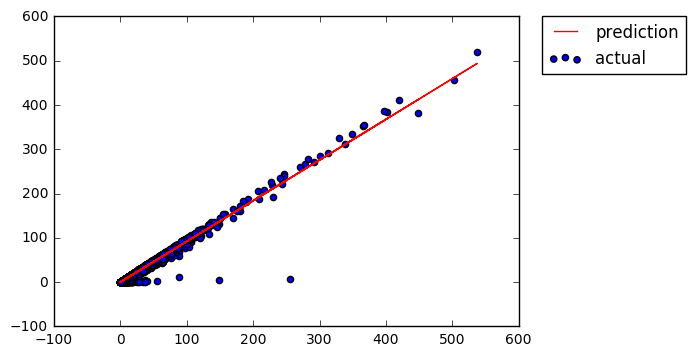

In [362]:
#train error
error = 0
xval = []
y1val = []
y2val = []
for l in train_data:
    pred = predict(l['reviewerID'],l['itemID'],int(l['helpful']['outOf']))
    xval.append(l['helpful']['outOf'])
    y1val.append(pred)
    t = int(l['helpful']['nHelpful'])
    y2val.append(t)
    error += np.abs(t-pred)
# temp = zip(xval,y1val,y2val)
# temp.sort()
# (xval,y1val,y2val) = zip(*temp)
plt.plot(xval,y1val,label='prediction',color='red')
plt.scatter(xval,y2val,label='actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
print error*1.0/len(train_data)

In [282]:
averageRate = sum([x['nHelpful'] for x in allHelpful]) * 1.0 / sum([x['outOf'] for x in allHelpful])
userRate = {}
itemRate = {}
userTheta = {}
itemTheta = {}
for u in userHelpful:
  totalU = sum([x['outOf'] for x in userHelpful[u]])
  if totalU > 0:
    userRate[u] = sum([x['nHelpful'] for x in userHelpful[u]]) * 1.0 / totalU
  else:
    userRate[u] = averageRate
  features = [[1,x['outOf']] for x in userHelpful[u]]
  labels = [x['nHelpful'] for x in userHelpful[u]]
  theta,residuals,rank,s = np.linalg.lstsq(features, labels)
  userTheta[u] = theta

for i in itemHelpful:
    totalI = sum([x['outOf'] for x in itemHelpful[i]])
    if totalI > 0:
        itemRate[i] = sum([x['nHelpful'] for x in itemHelpful[i]]) * 1.0 / totalI
    else:
        itemRate[i] = averageRate
    features = [[1,x['outOf']] for x in itemHelpful[i]]
    labels = [x['nHelpful'] for x in itemHelpful[i]]
    theta,residuals,rank,s = np.linalg.lstsq(features, labels)
    itemTheta[i] = theta
print "done"

done


In [331]:
def predict(u,i,outOf):
#     if u in userRate:
#         pred1 = outOf*userRate[u]
#     else:
#         pred1 = outOf*averageRate
#     if i in itemRate:
#         pred2 = outOf*itemRate[i]
#     else:
#         pred2 = outOf*averageRate
#     pred = (pred1 + pred2)/2.0
    pred = globalTheta[0] + (globalTheta[1]*outOf)
#     pred2 = pred
#     pred3 = pred
#     if u in userTheta:
#         pred2 = (outOf*userTheta[u][1]) + userTheta[u][0]
#     if i in itemTheta:
#         pred3 = (outOf*itemTheta[i][1]) + itemTheta[i][0]
#     pred = (pred + pred2 + pred3)/3.0
    if outOf == 0:
        return 0
    if pred < 0 :
        return 0
    if pred > outOf :
        return outOf
    return pred

In [317]:
#validation
error = 0
xval = []
y1val = []
y2val = []
for l in val_data:
    pred = predict(l['reviewerID'],l['itemID'],int(l['helpful']['outOf']))
    xval.append(l['helpful']['outOf'])
    y1val.append(pred)
    t = int(l['helpful']['nHelpful'])
    y2val.append(t)
    error += np.abs(t-pred)
# temp = zip(xval,y1val,y2val)
# temp.sort()
# (xval,y1val,y2val) = zip(*temp)
# plt.plot(xval,y1val,label='prediction')
# plt.plot(xval,y2val,label='actual')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
print error/len(val_data)

new user
new user
new item
new user
new user
new user
new user
new user
new item
new user
new user
new item
new user
new user
new item
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
new user
0.209682382609


In [258]:
predictions = open("../Predictions/predictions_Helpful.txt", 'w')
for l in open("../Predictions/pairs_Helpful.txt"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,i,outOf = l.strip().split('-')
  outOf = int(outOf)
  pred = predict(u,i,outOf)
  predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(pred) + '\n')
predictions.close()